Collect Data from gdf file

In [8]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# ─── Configuration ─────────────────────────────────────────────────────────
base_path = "DS"  # Adjust the path according to your dataset location
subjects = range(1, 2)
runs     = range(1, 11)
eeg_labels = [
    "F3","F1","Fz","F2","F4","FFC5h","FFC3h","FFC1h","FFC2h","FFC4h","FFC6h",
    "FC5","FC3","FC1","FCz","FC2","FC4","FC6","FTT7h","FCC5h","FCC3h","FCC6h",
    "FTT8h","C5","C3","C1","Cz","C2","C4","C6","TTP7h",
    "CCP5h","CCP3h","CCP1h","CCP2h","CCP4h","CCP6h","TTP8h","CP5","CP3","CP1",
    "CPz","CPP5h","CPP3h","CPP1h","CPP2h","CPP4h","CPP6h","P3","P1","Pz","P2","P4","PPO1h",
    "PPO2h"
]
# only interested in these event codes
event_codes = [1, 2, 5, 6]
# mapping original codes to 0-3
label_map = {1: 0, 2: 1, 5: 2, 6: 3}

# ─── 1) Load & epoch all runs ───────────────────────────────────────────────
X_list, y_list = [], []
for subj in subjects:
    for run in runs:
        fp = f"{base_path}/S{subj}_MI/motorimagination_subject{subj}_run{run}.gdf"
        raw = mne.io.read_raw_gdf(fp, preload=True, verbose=False)
        to_keep = [ch for ch in eeg_labels if ch in raw.ch_names]
        raw.pick_channels(to_keep)
        raw.filter(0.5, 50.0, verbose=False)

        events, _ = mne.events_from_annotations(raw)
        epochs = mne.Epochs(
            raw, events, event_codes,
            tmin=-2.0, tmax=3.0,
            baseline=(None, 0.0),
            preload=True, verbose=False
        )

        data   = epochs.get_data()            # (n_epochs, n_ch, n_times)
        labels = epochs.events[:, 2].astype(int)  # (n_epochs,)

        # keep only epochs without NaNs
        mask = ~np.isnan(data).any(axis=(1, 2))
        valid_data   = data[mask]
        valid_labels = labels[mask]

        # map labels 1,2,5,6 -> 0,1,2,3
        valid_labels_mapped = np.array([label_map[l] for l in valid_labels], dtype=int)

        X_list.append(valid_data)
        y_list.append(valid_labels_mapped)

# concatenate all runs
X = np.concatenate(X_list, axis=0)  # (n_epochs, n_ch, n_times)
y = np.concatenate(y_list, axis=0)  # (n_epochs,)

print("After filtering & mapping:", X.shape, "labels:", np.unique(y), np.bincount(y))


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'armeodummy'}. Applying running numbers for duplicates.
  next(self.gen)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']
After filtering & mapping: (212, 55, 2561) labels: [0 1 2 3] [53 55 52 52]


watching all events(1-4) shape no. of samples

In [ ]:
print("Shape of all events (1-4):")
# Check the shape of each event
for i in range(0, 4):
    print(f"Event {i}: {X[y == i].shape}")

Shape of all events (1-7):
Event 0: (53, 55, 2561)
Event 1: (55, 55, 2561)
Event 2: (52, 55, 2561)
Event 3: (52, 55, 2561)


check if there are any NAN values in the data of every sample for every event

In [ ]:
for i in range(0, 4):
    print(f"Event {i}: {np.isnan(X[y == i]).sum()}")

print("Any all-NaN channels left? ",
      np.any(np.all(np.isnan(X), axis=2)))
print("Any all-zero channels left? ",
      np.any(np.all(X == 0,      axis=2)))
print("Any NaNs at all? ", np.isnan(X).any())
print("Any zeros at all? ", np.any(X == 0))

Event 0: 0
Event 1: 0
Event 2: 0
Event 3: 0
Any all-NaN channels left?  False
Any all-zero channels left?  False
Any NaNs at all?  False
Any zeros at all?  False


LSTM

Windowed X shape: (271148, 5, 55)
Windowed y shape: (271148,)
Before casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
After casting:
  X_train dtype: float32 X_test dtype: float32
  y_train dtype: int32 y_test dtype: int32
Epoch 1/100


C:\Users\ik111\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5084/5084 - 22s - 4ms/step - accuracy: 0.2769 - loss: 1.3900 - val_accuracy: 0.2938 - val_loss: 1.3753
Epoch 2/100
5084/5084 - 19s - 4ms/step - accuracy: 0.3061 - loss: 1.3694 - val_accuracy: 0.3290 - val_loss: 1.3579
Epoch 3/100
5084/5084 - 17s - 3ms/step - accuracy: 0.3297 - loss: 1.3520 - val_accuracy: 0.3358 - val_loss: 1.3460
Epoch 4/100
5084/5084 - 17s - 3ms/step - accuracy: 0.3475 - loss: 1.3366 - val_accuracy: 0.3577 - val_loss: 1.3293
Epoch 5/100
5084/5084 - 17s - 3ms/step - accuracy: 0.3648 - loss: 1.3176 - val_accuracy: 0.3679 - val_loss: 1.3123
Epoch 6/100
5084/5084 - 17s - 3ms/step - accuracy: 0.3817 - loss: 1.2997 - val_accuracy: 0.3874 - val_loss: 1.2940
Epoch 7/100
5084/5084 - 19s - 4ms/step - accuracy: 0.3928 - loss: 1.2851 - val_accuracy: 0.3961 - val_loss: 1.2850
Epoch 8/100
5084/5084 - 18s - 3ms/step - accuracy: 0.4026 - loss: 1.2709 - val_accuracy: 0.3999 - val_loss: 1.2775
Epoch 9/100
5084/5084 - 19s - 4ms/step - accuracy: 0.4149 - loss: 1.2559 - val_accuracy: 0.4

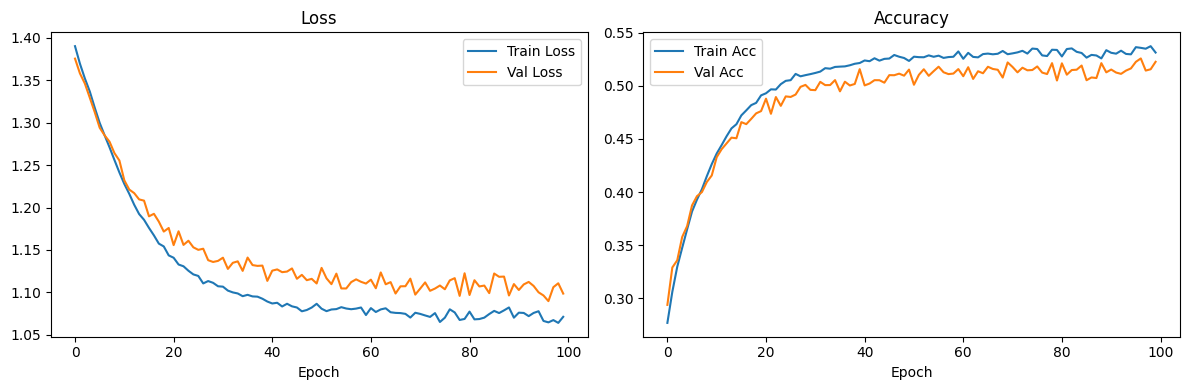

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1) Prepare sequence data for LSTM
# LSTM expects (samples, timesteps, features)
# we have (epochs, channels, times) → swap to (epochs, times, channels)
X_seq = np.transpose(X, (0, 2, 1)).astype('float32')
# Adjust labels to be in the range [0, n_classes-1] and ensure a 1D array
y_seq = (y.astype('int32').squeeze())  # ensure integer dtype, 1D array, and adjust range

# ─── Before your train/test split ────────────────────────────────────────────

def sliding_windows(X, y, window_size, step=None):
    if step is None:
        step = window_size // 2
    Xw, yw = [], []
    n_epochs, n_times, n_ch = X.shape
    for i in range(n_epochs):
        for start in range(0, n_times - window_size + 1, step):
            Xw.append(X[i, start:start+window_size, :])
            yw.append(y[i])
    return np.array(Xw, dtype='float32'), np.array(yw, dtype='int32')

# ─── Example usage ───────────────────────────────────────────────────────────
window_size = 5   #->window size
step        = 2  #->  overlap

X_windows, y_windows = sliding_windows(X_seq, y_seq, window_size, step)

print("Windowed X shape:", X_windows.shape)  # (n_windows, 10, n_channels)
print("Windowed y shape:", y_windows.shape)  # (n_windows,)


# Now split *these* windows into train/val/test instead of the full‐epoch data
X_tr, X_temp, y_tr, y_temp = train_test_split(
    X_windows, y_windows,
    test_size=0.4,
    random_state=42,
    stratify=y_windows
)
X_val, X_te, y_val, y_te = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# 1) Debug print
print("Before casting:")
print("  X_train dtype:", X_tr.dtype, "X_test dtype:",  X_te.dtype)
print("  y_train dtype:", y_tr.dtype, "y_test dtype:",  y_te.dtype)

# 2) Force numeric types
X_train = X_tr.astype('float32')
X_test  = X_te.astype('float32')
y_train = y_tr.astype('int32')
y_test  = y_te.astype('int32')

print("After casting:")
print("  X_train dtype:", X_train.dtype, "X_test dtype:",  X_test.dtype)
print("  y_train dtype:", y_train.dtype, "y_test dtype:",  y_test.dtype)

# 3) Build & compile
model = Sequential([
    LSTM(50, return_sequences=True,
         input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])
model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4) Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100, batch_size=32, verbose=2
)


# 5) Evaluate on held-out test set
test_loss, test_acc = model.evaluate(X_te, y_te, batch_size=32, verbose=0)
print(f"\nTest loss: {test_loss:.4f} | Test accuracy: {test_acc:.2%}")

# 6) Plot learning curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],   label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],   label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 5, 32)          │         5,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,548 (111.52 KB)

 Trainable params: 28,548 (111.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5084/5084 - 18s - 4ms/step - accuracy: 0.2634 - loss: 1.4048 - val_accuracy: 0.2665 - val_loss: 1.3844
Epoch 2/100
5084/5084 - 16s - 3ms/step - accuracy: 0.2607 - loss: 1.3857 - val_accuracy: 0.2614 - val_loss: 1.3844
Epoch 3/100
5084/5084 - 16s - 3ms/step - accuracy: 0.2599 - loss: 1.3857 - val_accuracy: 0.2604 - val_loss: 1.3852
Epoch 4/100
5084/5084 - 16s - 3ms/step - accuracy: 0.2606 - loss: 1.3860 - val_accuracy: 0.2603 - val_loss: 1.3851
Epoch 5/100
5084/5084 - 16s - 3ms/step - accuracy: 0.2602 - loss: 1.3855 - val_accuracy: 0.2602 - val_loss: 1.3851
Epoch 6/100
5084/5084 - 16s - 3ms/step - accuracy: 0.2604 - loss: 1.3854 - val_accuracy: 0.2607 - val_loss: 1.3847
Epoch 7/100
5084/5084 - 15s - 3ms/step - accuracy: 0.2594 - loss: 1.3856 - val_accuracy: 0.2600 - val_loss: 1.3853
Epoch 8/100
5084/5084 - 15s - 3ms/step - accuracy: 0.2600 - loss: 1.3855 - val_accuracy: 0.2607 - val_loss: 1.3861
Epoch 9/100
5084/5084 - 15s - 3ms/step - accuracy: 0.2597 - loss: 1.3857 - val_a

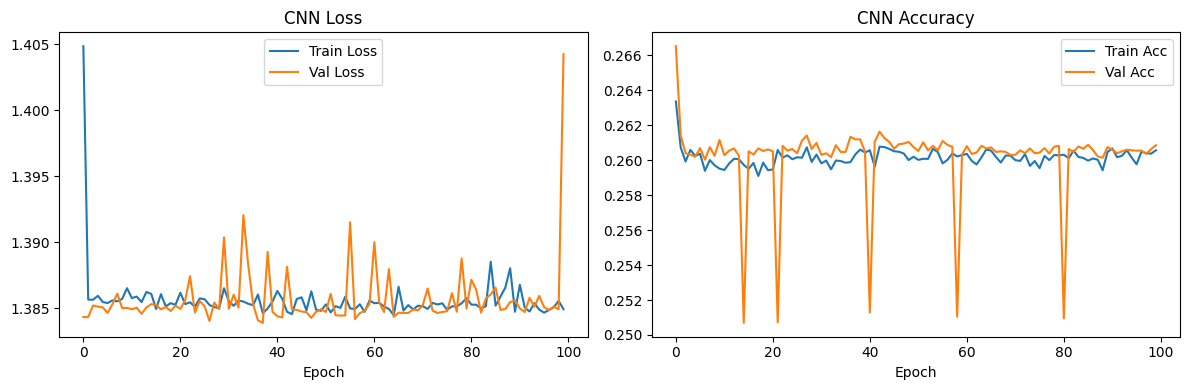

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ─── 1) CNN Configuration ────────────────────────────────────────────────────
n_classes = 4
window_size = X_train.shape[1]
n_channels = X_train.shape[2]

# ─── 2) Build & compile 1D‐CNN ────────────────────────────────────────────────
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', padding='same',
           input_shape=(window_size, n_channels)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    # Removed second MaxPooling1D to avoid negative output size
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])
model_cnn.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.summary()

# ─── 3) Train ───────────────────────────────────────────────────────────────
history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=2
)

# ─── 4) Evaluate ────────────────────────────────────────────────────────────
loss_cnn, acc_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"\nCNN Test Loss: {loss_cnn:.4f} | CNN Test Accuracy: {acc_cnn:.2%}")

# ─── 5) Plot learning curves ─────────────────────────────────────────────────
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('CNN Loss'); 
plt.xlabel('Epoch'); 
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy'); 
plt.xlabel('Epoch'); 
plt.legend()

plt.tight_layout()
plt.show()
